# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Analysis

Latitude vs. Max Temp: Weather is generally warmer in the southern hemispehere in January, and +/- 10 degrees from the equator. Interestingly, the weather in the northern hemisphere is significantly lower than the southern hemisphere during this time of year.

Latitude vs. Humidity: There is no strong relationship between latitude and humidity. It is interesting to observe that humidity ranges from 20-100% in both the northern and southern hemispheres at this time.

Latitude vs. Cloudiness: There is no strong relationship between latitude and cloudiness. However, there is a strong band of cities that resides at 0 and 90+% cloudiness.

Latitude vs. Wind Speed: There is no strong relationship between latitude and wind speed. It is interesting to note that a good number of cities in both northern and southern hemispheres have low wind speeds, between 0-10 km/h.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from Config import api_key_owm

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lon_range = (-180, 180)

In [4]:
!pip install citipy

## Generate Cities List

In [5]:
# List for holding lat_lon and cities
lat_lon = []
cities = []

# Create a set of random lat and lng combinations
lat = np.random.uniform(lat_range[0], lat_range[1], size=1300)
lon = np.random.uniform(lon_range[0], lon_range[1], size=1300)
lat_lon = zip(lat, lon)

# Identify nearest city for each lat, lng combination
for lat_lon in lat_lon:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

585

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Create variables for API call
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key = api_key_owm

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
City = []
Lat = []
Lon = []
Country = []
Date = []
Max_Temp = []
Cloudiness = []
Humidity = []
Wind_Speed = []

In [7]:
# Loop through the list of cities and perform a request for data on each

print('Beginning Data Retrieval')     
print('-----------------------------')
i=0 

for city in cities:
    #print(f"query_url is : {query_url}")
    response = requests.get(query_url + city).json()
    #print(f"response is : {response}")
    cod = response['cod']
    if cod == 200: 
        i = i + 1
        City.append(response['name'])
        Lat.append(response['coord']['lat'])
        Lon.append(response['coord']['lon'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Max_Temp.append(response['main']['temp_max'])
        Cloudiness.append(response['clouds']['all'])
        Humidity.append(response['main']['humidity'])
        Wind_Speed.append(response['wind']['speed'])
        print(f'Processing Record {i} of Set 1 | {city}')
    else:
        # If error then skip city
        print(f'City not found. Skipping...')
    
print(f'-----------------------------')
print(f'Data Retrieval Complete     ')
print(f'-----------------------------')

f Set 1 | vestmannaeyjar
Processing Record 94 of Set 1 | saskylakh
Processing Record 95 of Set 1 | kayes
Processing Record 96 of Set 1 | nacala
Processing Record 97 of Set 1 | kirakira
Processing Record 98 of Set 1 | henderson
Processing Record 99 of Set 1 | bell ville
Processing Record 100 of Set 1 | itoman
Processing Record 101 of Set 1 | kayerkan
Processing Record 102 of Set 1 | agadez
Processing Record 103 of Set 1 | hobyo
Processing Record 104 of Set 1 | provideniya
Processing Record 105 of Set 1 | keti bandar
City not found. Skipping...
Processing Record 106 of Set 1 | mahebourg
Processing Record 107 of Set 1 | maraa
Processing Record 108 of Set 1 | great bend
Processing Record 109 of Set 1 | mount gambier
Processing Record 110 of Set 1 | sinnamary
Processing Record 111 of Set 1 | batemans bay
Processing Record 112 of Set 1 | fortuna
Processing Record 113 of Set 1 | vaini
Processing Record 114 of Set 1 | norman wells
Processing Record 115 of Set 1 | skibbereen
Processing Record 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:


city_weather = {
    "City": City,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date": Date,
    "Humidity": Humidity,
    "Lat": Lat,
    "Lng": Lon,
    "Max Temp": Max_Temp,
    "Wind Speed": Wind_Speed
}

city_weather_df = pd.DataFrame(city_weather)
city_weather_df.to_csv('..\output_data\WeatherPy_data.csv', index_label = "City_ID")

# Show city dataframe
city_weather_df.head()





,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Lebu,0,CL,1611665191,68,-37.6167,-73.6500,14.46,8.05
1,Ushuaia,90,AR,1611665191,87,-54.8000,-68.3000,4.00,14.92
2,Saint Paul Harbor,1,US,1611665192,69,57.7900,-152.4072,2.00,5.66
3,Puerto Ayora,65,EC,1611665192,98,-0.7393,-90.3518,23.33,3.58
4,Rikitea,0,PF,1611665193,73,-23.1203,-134.9692,26.00,6.05


In [9]:
# Show count of records
city_weather_df.count()

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
city_weather_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,535.000000,5.350000e+02,535.000000,535.000000,535.000000,535.000000,535.000000
mean,60.235514,1.611665e+09,73.239252,19.916068,17.550520,9.911477,3.991495
std,40.615635,1.258188e+02,20.519442,34.266915,90.700959,19.522138,2.914901
min,0.000000,1.611665e+09,7.000000,-54.800000,-179.166700,-45.740000,0.100000
25%,20.000000,1.611665e+09,65.500000,-10.634200,-61.624950,-1.195000,1.730000
50%,75.000000,1.611665e+09,77.000000,24.144700,22.681400,17.410000,3.440000
75%,100.000000,1.611665e+09,87.000000,50.700150,96.664250,25.645000,5.450000
max,100.000000,1.611666e+09,100.000000,78.218600,179.316700,37.700000,15.430000


In [11]:
#  Get the indices of cities that have humidity over 100%.
#   Not required as max humdity is not higher than 110%

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#   Not required as max humdity is not higher than 110%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

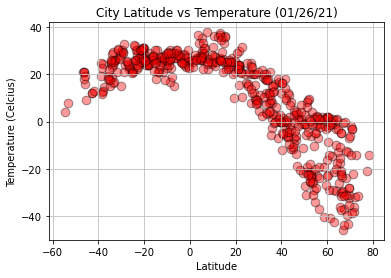

In [13]:
plt.figure(figsize = (6, 4))
plt.scatter(city_weather_df['Lat'], city_weather_df['Max Temp'], s=75, c="red", edgecolors='black', alpha=0.4)
plt.grid(color="0.75", linestyle="-")
plt.title("City Latitude vs Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celcius)")

#save the plot
plt.savefig('..\output_data\lat_v_temp.png')
plt.show()

## Latitude vs. Humidity Plot

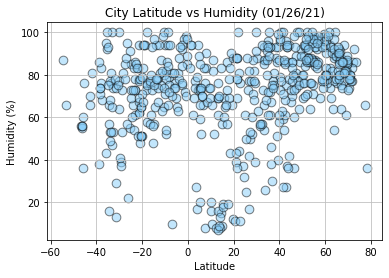

In [14]:
plt.figure(figsize = (6, 4))
plt.scatter(city_weather_df['Lat'], city_weather_df['Humidity'], s=75, c="lightskyblue", edgecolors='black', alpha=0.5)
plt.grid(color="0.75", linestyle="-")
plt.title("City Latitude vs Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#save the plot
plt.savefig('..\output_data\lat_v_humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

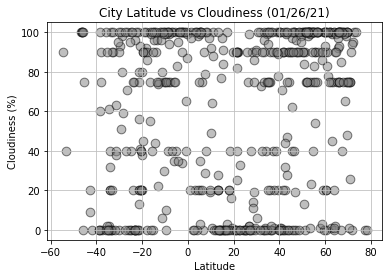

In [15]:
plt.figure(figsize = (6, 4))
plt.scatter(city_weather_df['Lat'], city_weather_df['Cloudiness'], s=75, c="grey", edgecolors='black', alpha=0.5)
plt.grid(color="0.75", linestyle="-")
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#save the plot
plt.savefig('..\output_data\lat_v_cloud.png')
plt.show()

## Latitude vs. Wind Speed Plot

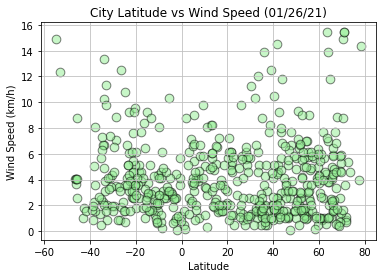

In [16]:
plt.figure(figsize = (6, 4))
plt.scatter(city_weather_df['Lat'], city_weather_df['Wind Speed'], s=75, c="lightgreen", edgecolors='black', alpha=0.5)
plt.grid(color="0.75", linestyle="-")
plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (km/h)")

#save the plot
plt.savefig('..\output_data\lat_v_wind.png')
plt.show()

## Linear Regression

In [17]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on hemispheres
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_weather_df.loc[(city_weather_df["Lat"] >= 0)]
southern_hemi_df = city_weather_df.loc[(city_weather_df["Lat"] < 0)]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7457752706284715


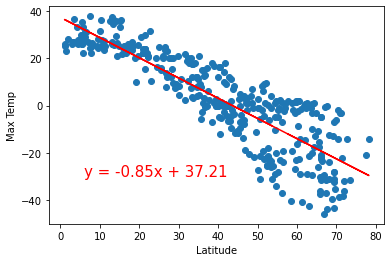

In [18]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,-30))


In [19]:
# As epected the high r value indicates a strong positive correlation between latitude and max temperature in the northern hemisphere

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.237482559032851


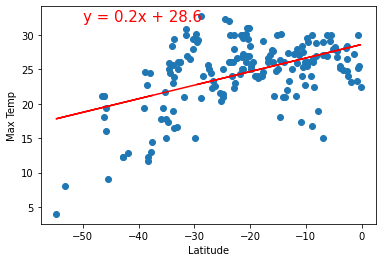

In [20]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-50,32))


In [21]:
# Surprisingly low r value indicates a weak positive correlation between latitude and max temperature in the southern hemisphere. This maybe due to less data points are available, as there is a smaller volume of land in the lower half of the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.18606956972946073


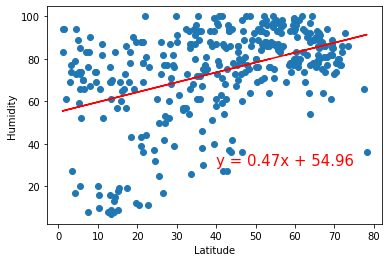

In [22]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,30))


In [23]:
# The low r values indicate a weak to no relationship between humidity and latitude in the northern hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08103902426955313


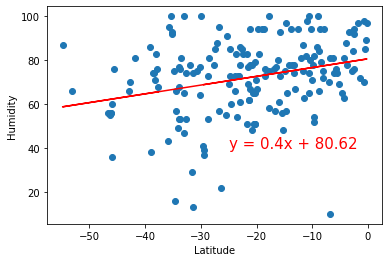

In [24]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-25,40))


In [25]:
# The low r values indicate a weak to no relationship between humidity and latitude in the southern hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09416754456975465


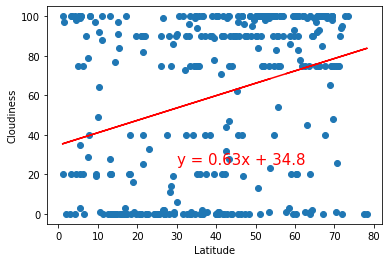

In [26]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (30,25))


In [27]:
# The low r values indicate a weak to no relationship between cloudiness and latitude in the northern hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08508713246037548


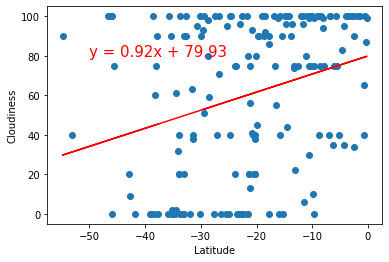

In [28]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-50,80))


In [29]:
# The low r values indicate a weak to no relationship between cloudiness and latitude in the southern hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0022725726155979962


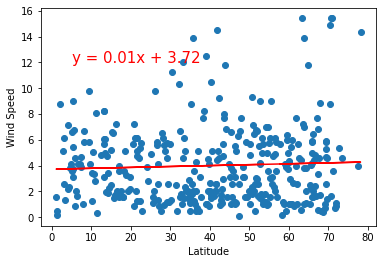

In [30]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (5,12))


In [31]:
# The low r values indicate a weak to no relationship between wind and latitude in the northern hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06810071394234019


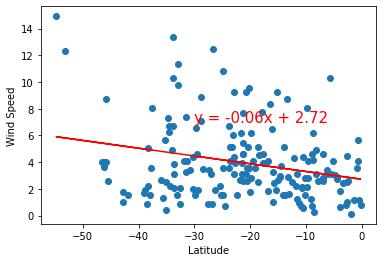

In [32]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-30,7))


In [33]:
# The low r values indicate a weak to no relationship between wind and latitude in the southern hemisphere